In [38]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import os
data = load_breast_cancer()
x, y = data['data'], data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size=0.8, random_state=40)


# Cross validation 

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=40)

sgd_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=5, random_state=40)

In [24]:
sgd_clf.predict([x_test[2]])

array([1])

In [25]:
y_test[2]

1

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

array([0.75824176, 0.9010989 , 0.75824176, 0.76923077, 0.86813187])

# Confusion matrix 

why condusion matrix:
 for example the dataset has 1000 dataset, 990 no cancer, 10 has cancer, the model predict that 1000 has no cancer, the accuracy can reach to 99%

- recall score: if predicted no cancer, the recall is 0/10, predicted 5 cancer, recall is 5/10
Class has 100 student in total, boys 80, girls 20, target is to find all girl.
Predict results, choose 50 student, 20 is girl, 30 is boy
- True positive: 20
- False positive: 30
- False negative: 0
- True negative: 50


In [46]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf, x_train, y_train, cv=3)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_predict) # TN, FP
                      # FN TP

array([[156,  17],
       [ 27, 255]])

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(y_train, y_train_predict)

0.9375

In [49]:
recall_score(y_train, y_train_predict)

0.9042553191489362

In [50]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train, y_train_predict)

0.92057761732852

# Thresholds

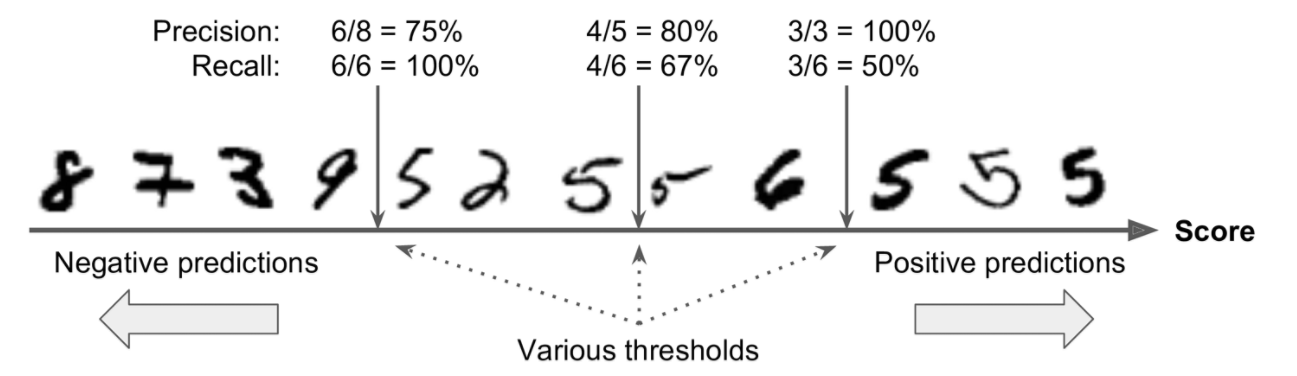

In [51]:
# return confidence score to the sample
y_score = sgd_clf.decision_function([x[100]])
y_score

array([-255684.93401124])

In [52]:
t = -20000
y_pred = (y_score > t)
y_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method='decision_function'
)
y_scores[:10]

In [57]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

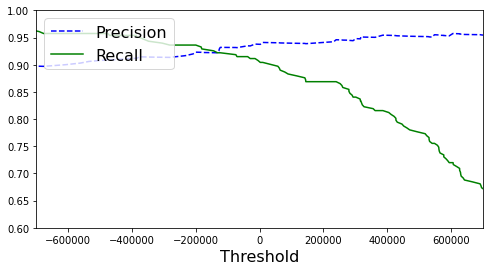

In [62]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0.6,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
plt.show()

# ROC

- receiver operating characteristic
- plot true positive rate and false positive rate 
- suit for classification 

TPR = TP/(TP+FN)

FPR = FP/(FP+TN)

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

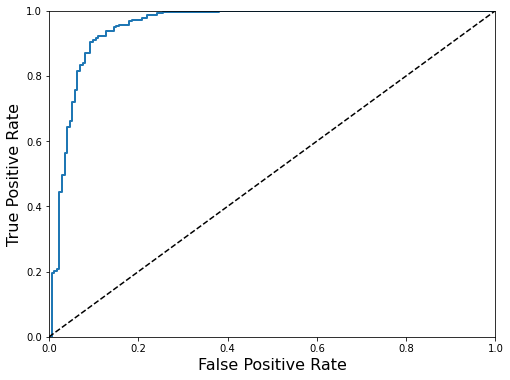

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_train, y_scores)
roc_score

0.9527118435616776